# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 10
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [19]:
train_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"), rot_mult=2)

Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 8


In [ ]:
id=3
aug_ranges = [range(4), range(4,8)]
for aug_range in aug_ranges:
    comp_events([pd.DataFrame(train_fy.get_test_fold(0, i)['inputs'], columns=train_feats)[id:id+1] for i in aug_range])

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.845s 


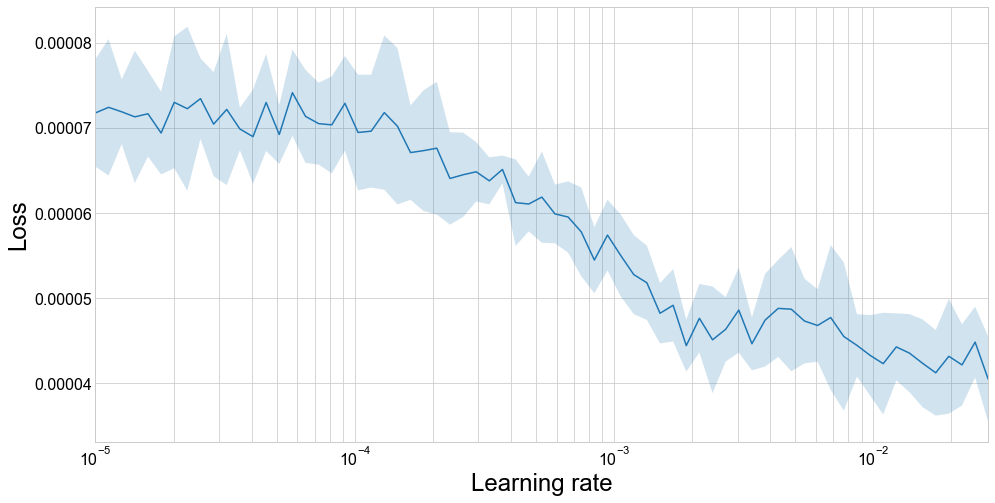

______________________________________



In [5]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [20]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'LinearCLR':{'reverse':False, 'max_lr':2e-3, 'min_lr':2e-4, 'scale':2}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using linear LR cycle
2 classes found, running in binary mode

1 New best found: 4.190383960376494e-05
2 New best found: 3.644131124310661e-05
3 New best found: 3.503804362990195e-05
Saving snapshot 1
4 New best found: 3.4449614575714804e-05
5 New best found: 3.398035376012558e-05
7 New best found: 3.379834545630729e-05
Saving snapshot 2
8 New best found: 3.292637377162464e-05
11 New best found: 3.2919382165709974e-05
Saving snapshot 3
12 New best found: 3.236071642604657e-05
13 New best found: 3.2298409257782626e-05
Saving snapshot 4
16 New best found: 3.2206410595972556e-05
Saving snapshot 5
20 New best found: 3.196840862947283e-05
21 New best found: 3.187265072629089e-05
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.160911767627113e-05
Saving snapshot 8
Saving snapshot 9
36 New best found: 3.140367162268376e-05
Saving snapshot 10
Saving snapshot 11
44 New best found: 3.129217205569148e-05
Saving snapshot 12
48 New best found: 3

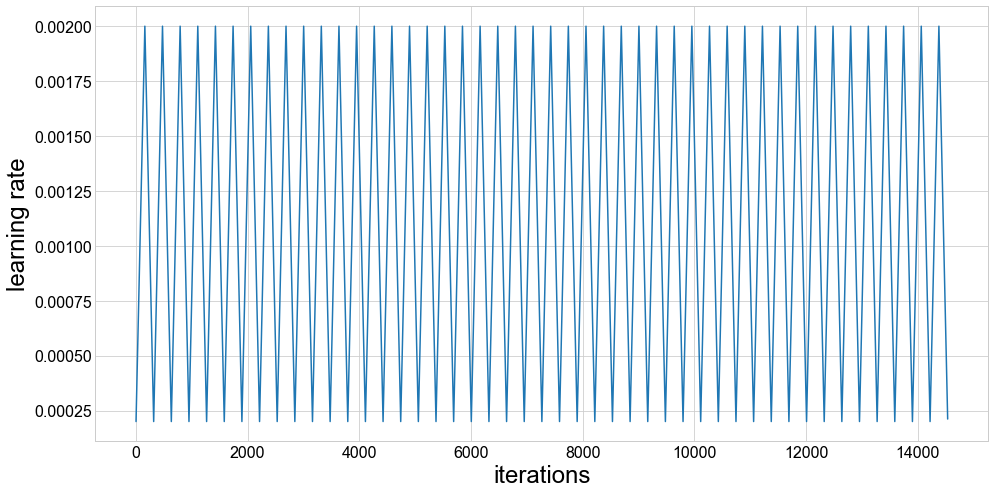

Fold took 108.731s

Training model 2 / 10
Using linear LR cycle
1 New best found: 4.0835544866440945e-05
2 New best found: 3.730966466110309e-05
3 New best found: 3.589802685409906e-05
Saving snapshot 1
4 New best found: 3.484700021208147e-05
6 New best found: 3.467004853234798e-05
7 New best found: 3.431507554744587e-05
Saving snapshot 2
8 New best found: 3.390162458228718e-05
11 New best found: 3.368808387985807e-05
Saving snapshot 3
12 New best found: 3.3616097686457886e-05
13 New best found: 3.345883254985167e-05
Saving snapshot 4
16 New best found: 3.3310788541499815e-05
17 New best found: 3.324733547251274e-05
19 New best found: 3.311746296965873e-05
Saving snapshot 5
Saving snapshot 6
24 New best found: 3.2928618007935544e-05
25 New best found: 3.279857918583682e-05
Saving snapshot 7
28 New best found: 3.275838202307302e-05
Saving snapshot 8
Saving snapshot 9
36 New best found: 3.258382504038806e-05
Saving snapshot 10
40 New best found: 3.2561600637314755e-05
Saving snapshot 11


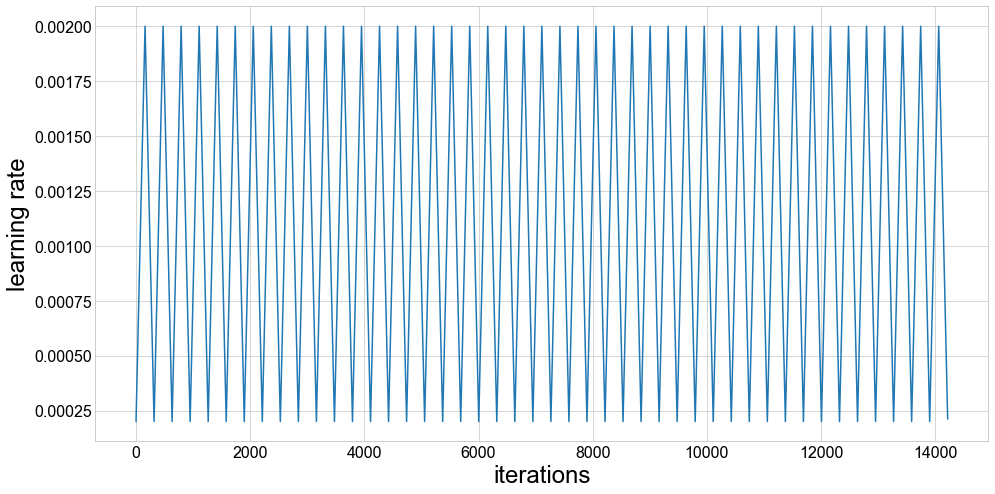

Fold took 108.941s

Training model 3 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106470). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0359718725177664e-05
2 New best found: 3.702380263973768e-05
3 New best found: 3.5893362563797334e-05
Saving snapshot 1
4 New best found: 3.4787476883472406e-05
7 New best found: 3.390325009071121e-05
Saving snapshot 2
8 New best found: 3.364089958082595e-05
11 New best found: 3.356989869193762e-05
Saving snapshot 3
12 New best found: 3.3149357464844154e-05
13 New best found: 3.3058578935467146e-05
Saving snapshot 4
16 New best found: 3.267884864767759e-05
Saving snapshot 5
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.249358728917526e-05
Saving snapshot 8
Saving snapshot 9
36 New best found: 3.243626574473401e-05
Saving snapshot 10
40 New best found: 3.2349193660119386e-05
Saving snapshot 11
44 New best found: 3.225520747358467e-05
45 New best found: 3.215994556745045e-05
Saving snapshot 12
48 New best found: 3.20639281124746e-05
Saving snapshot 13
52 New best found: 3.19839799541961e-05
Saving snapshot 14
Saving snapshot 15
Saving snapshot 16
Saving sna

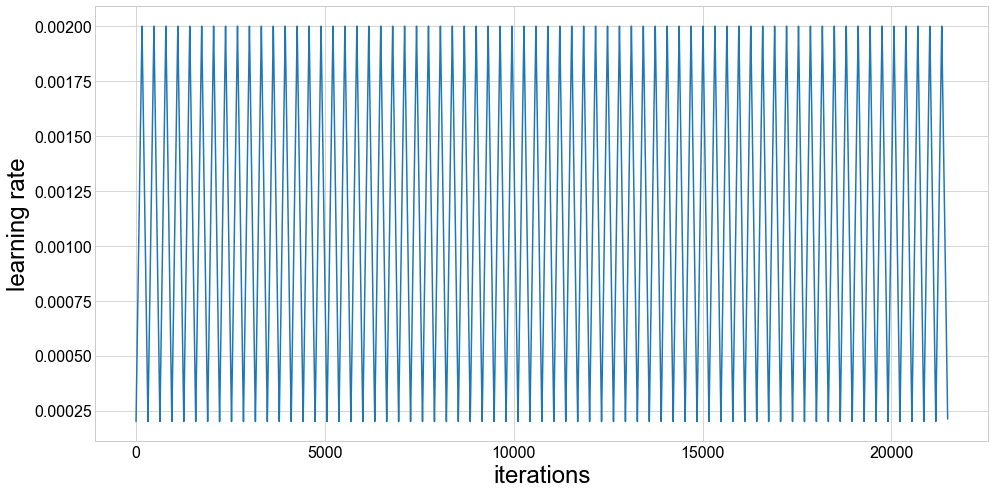

Fold took 165.433s

Training model 4 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110971). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1387701565690804e-05
2 New best found: 3.849486059916671e-05
3 New best found: 3.6408589710481464e-05
Saving snapshot 1
4 New best found: 3.575725417467765e-05
7 New best found: 3.5305943262210346e-05
Saving snapshot 2
8 New best found: 3.463121879467508e-05
Saving snapshot 3
12 New best found: 3.4093642260995696e-05
Saving snapshot 4
16 New best found: 3.395676964573795e-05
Saving snapshot 5
20 New best found: 3.3655811937933325e-05
Saving snapshot 6
24 New best found: 3.3605592262756546e-05
Saving snapshot 7
28 New best found: 3.346247176305042e-05
Saving snapshot 8
32 New best found: 3.335452184110182e-05
Saving snapshot 9
36 New best found: 3.319593381602317e-05
Saving snapshot 10
40 New best found: 3.3132482261862606e-05
Saving snapshot 11
Saving snapshot 12
49 New best found: 3.311535436369013e-05
Saving snapshot 13
55 New best found: 3.308828195295064e-05
Saving snapshot 14
56 New best found: 3.292509516031714e-05
Saving snapshot 15
Saving snapshot 16
Saving 

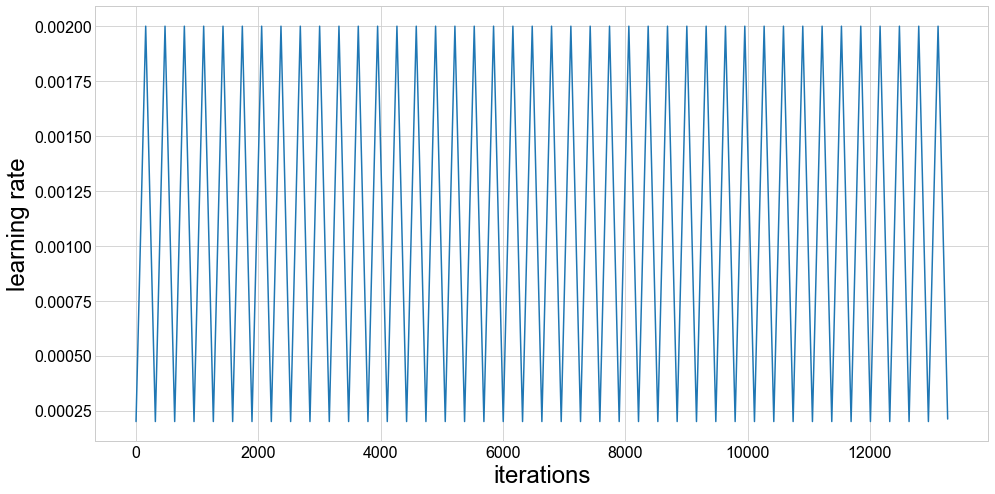

Fold took 105.657s

Training model 5 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118433). Check your callbacks.
  % delta_t_median)


1 New best found: 4.264312436867667e-05
2 New best found: 3.9432715098984494e-05
3 New best found: 3.713471396180034e-05
Saving snapshot 1
4 New best found: 3.568218720421394e-05
5 New best found: 3.558277246492827e-05
7 New best found: 3.499518483397918e-05
Saving snapshot 2
8 New best found: 3.452720272087544e-05
11 New best found: 3.426100045406299e-05
Saving snapshot 3
12 New best found: 3.3919999978825634e-05
Saving snapshot 4
16 New best found: 3.3680832191890746e-05
Saving snapshot 5
20 New best found: 3.359654960779849e-05
Saving snapshot 6
24 New best found: 3.3266761858636436e-05
Saving snapshot 7
28 New best found: 3.322086628781934e-05
Saving snapshot 8
32 New best found: 3.3073668938899505e-05
Saving snapshot 9
36 New best found: 3.3056362769241936e-05
Saving snapshot 10
40 New best found: 3.2968595550452886e-05
41 New best found: 3.2888348142434966e-05
Saving snapshot 11
Saving snapshot 12
49 New best found: 3.282768217662732e-05
Saving snapshot 13
Saving snapshot 14
56 N

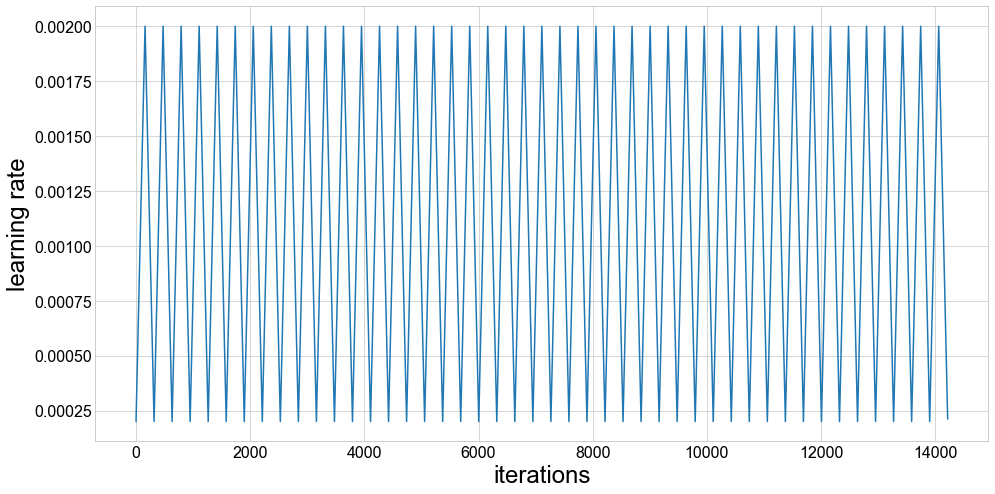

Fold took 113.709s

Training model 6 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126617). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0651551602298405e-05
2 New best found: 3.7006309881996166e-05
3 New best found: 3.5888835410976676e-05
Saving snapshot 1
4 New best found: 3.4920027962253394e-05
6 New best found: 3.4719418396355814e-05
Saving snapshot 2
8 New best found: 3.3930399221231765e-05
11 New best found: 3.3610918731894074e-05
Saving snapshot 3
12 New best found: 3.3453743484644563e-05
Saving snapshot 4
16 New best found: 3.3243641625153195e-05
Saving snapshot 5
20 New best found: 3.3144565624283975e-05
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.2788856612882805e-05
Saving snapshot 8
32 New best found: 3.277496482942616e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.268300840319307e-05
41 New best found: 3.267882647520803e-05
Saving snapshot 11
Saving snapshot 12
Saving snapshot 13
Saving snapshot 14
56 New best found: 3.261222361374753e-05
Saving snapshot 15
60 New best found: 3.257005063426779e-05
Saving snapshot 16
64 New best found: 3.251724485572494e-05
Sav

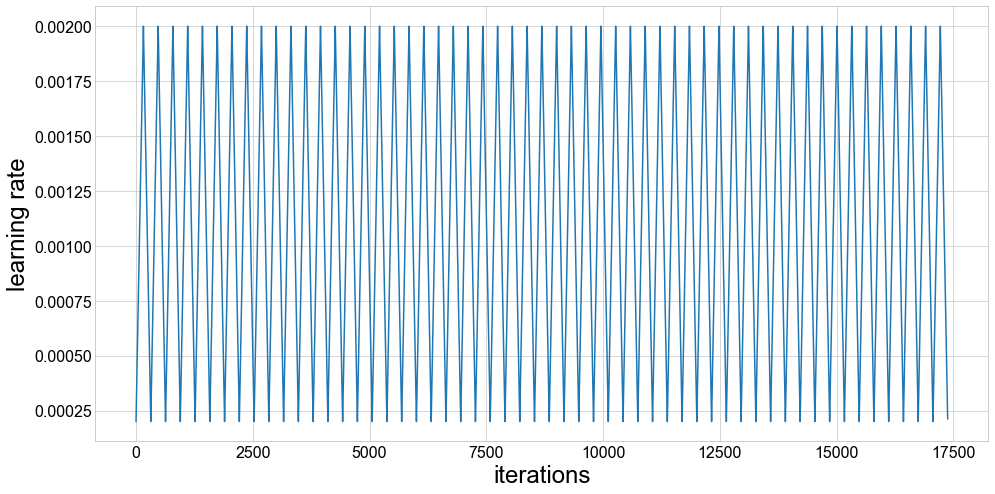

Fold took 140.789s

Training model 7 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.131120). Check your callbacks.
  % delta_t_median)


1 New best found: 4.163645071011183e-05
2 New best found: 3.8992755848445114e-05
3 New best found: 3.6766842412760094e-05
Saving snapshot 1
4 New best found: 3.6376690073520155e-05
7 New best found: 3.6136641205805765e-05
Saving snapshot 2
8 New best found: 3.552083751613384e-05
9 New best found: 3.5418930757886676e-05
Saving snapshot 3
12 New best found: 3.4941170461538124e-05
Saving snapshot 4
16 New best found: 3.481873298535303e-05
17 New best found: 3.469544202095868e-05
Saving snapshot 5
21 New best found: 3.448258247881239e-05
Saving snapshot 6
Saving snapshot 7
Saving snapshot 8
33 New best found: 3.432327545678649e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.4197783304676355e-05
41 New best found: 3.4181473250542084e-05
Saving snapshot 11
Saving snapshot 12
Saving snapshot 13
52 New best found: 3.412960642850205e-05
Saving snapshot 14
57 New best found: 3.398729962947803e-05
Saving snapshot 15
60 New best found: 3.395463570329195e-05
Saving snapshot 16
Saving 

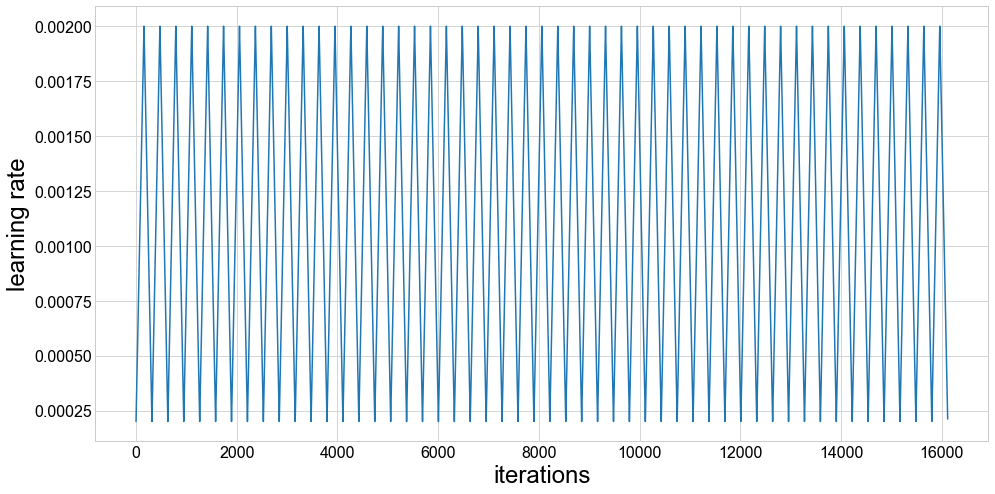

Fold took 135.022s

Training model 8 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138124). Check your callbacks.
  % delta_t_median)


1 New best found: 4.068952636735048e-05
2 New best found: 3.729145989200333e-05
3 New best found: 3.563340456894366e-05
Saving snapshot 1
4 New best found: 3.488107167358976e-05
7 New best found: 3.4624467058165464e-05
Saving snapshot 2
8 New best found: 3.38637375185499e-05
9 New best found: 3.380031162814703e-05
11 New best found: 3.37406300852308e-05
Saving snapshot 3
12 New best found: 3.351396342768567e-05
Saving snapshot 4
16 New best found: 3.3154413491138256e-05
19 New best found: 3.3057226685923524e-05
Saving snapshot 5
20 New best found: 3.296343673573574e-05
Saving snapshot 6
24 New best found: 3.279190970788477e-05
Saving snapshot 7
28 New best found: 3.27398110210197e-05
Saving snapshot 8
32 New best found: 3.2699130634136964e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.2679398095933724e-05
Saving snapshot 11
44 New best found: 3.265586970810546e-05
Saving snapshot 12
48 New best found: 3.265318166668294e-05
49 New best found: 3.264158232341288e-05
Saving 

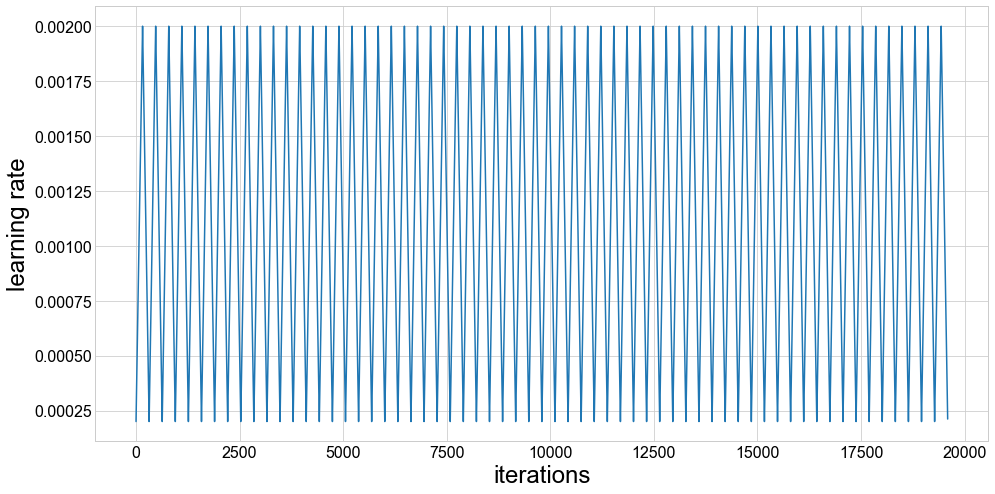

Fold took 164.803s

Training model 9 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149711). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0004170665633866e-05
2 New best found: 3.692090989934513e-05
3 New best found: 3.564413293643156e-05
Saving snapshot 1
4 New best found: 3.457953665783862e-05
7 New best found: 3.3835901868587823e-05
Saving snapshot 2
8 New best found: 3.347978921374306e-05
Saving snapshot 3
12 New best found: 3.303443400363903e-05
Saving snapshot 4
16 New best found: 3.290438726107823e-05
Saving snapshot 5
20 New best found: 3.275465466576861e-05
Saving snapshot 6
24 New best found: 3.2504452700959516e-05
25 New best found: 3.244726793855079e-05
Saving snapshot 7
28 New best found: 3.243703637563158e-05
Saving snapshot 8
32 New best found: 3.231868189322995e-05
Saving snapshot 9
37 New best found: 3.23066068944172e-05
Saving snapshot 10
40 New best found: 3.225649743544636e-05
41 New best found: 3.224820966279367e-05
43 New best found: 3.2245536026312035e-05
Saving snapshot 11
44 New best found: 3.209522355173249e-05
Saving snapshot 12
48 New best found: 3.20669043037924e-05
Saving

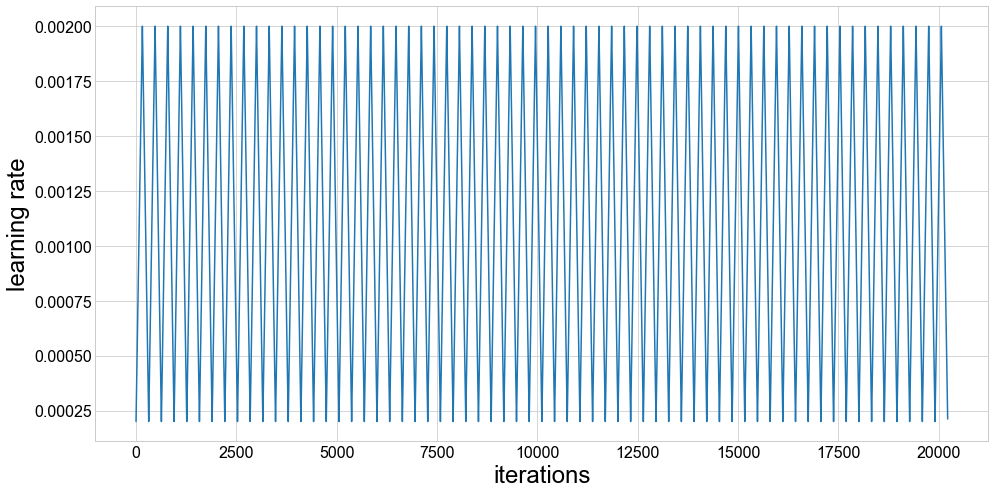

Fold took 172.689s

Training model 10 / 10
Using linear LR cycle


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152637). Check your callbacks.
  % delta_t_median)


1 New best found: 4.2099649992573726e-05
2 New best found: 3.748668769308121e-05
3 New best found: 3.562354931831115e-05
Saving snapshot 1
4 New best found: 3.50922941775704e-05
5 New best found: 3.502586001251787e-05
6 New best found: 3.46273299905062e-05
7 New best found: 3.408502315302438e-05
Saving snapshot 2
8 New best found: 3.350612258652225e-05
11 New best found: 3.326411213120427e-05
Saving snapshot 3
12 New best found: 3.300770981226127e-05
Saving snapshot 4
16 New best found: 3.2906619663251626e-05
17 New best found: 3.2695613114665176e-05
Saving snapshot 5
20 New best found: 3.249570592918289e-05
21 New best found: 3.239222893181978e-05
Saving snapshot 6
Saving snapshot 7
28 New best found: 3.231291377607814e-05
Saving snapshot 8
32 New best found: 3.223063459252012e-05
Saving snapshot 9
Saving snapshot 10
40 New best found: 3.214998396548266e-05
Saving snapshot 11
44 New best found: 3.199179962383277e-05
Saving snapshot 12
Saving snapshot 13
52 New best found: 3.1976226827

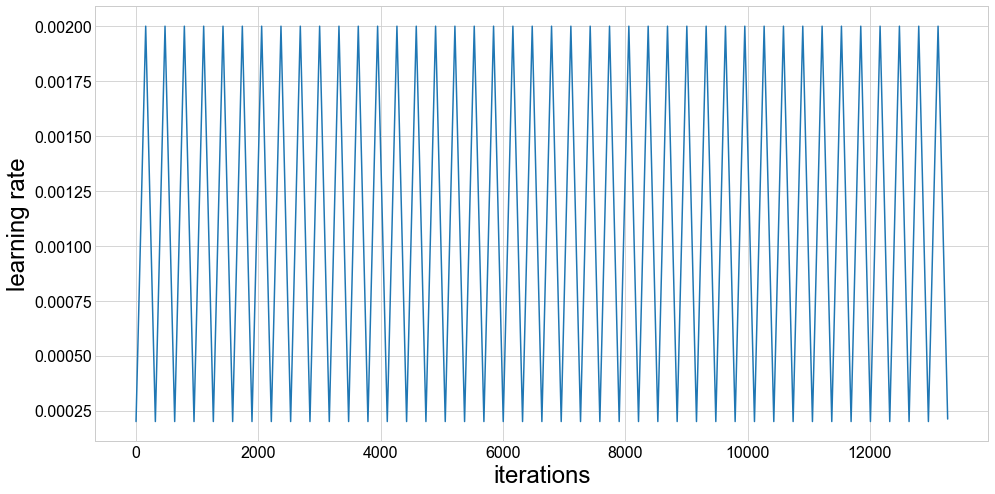

Fold took 115.865s


______________________________________
Training finished
Cross-validation took 1331.785s 


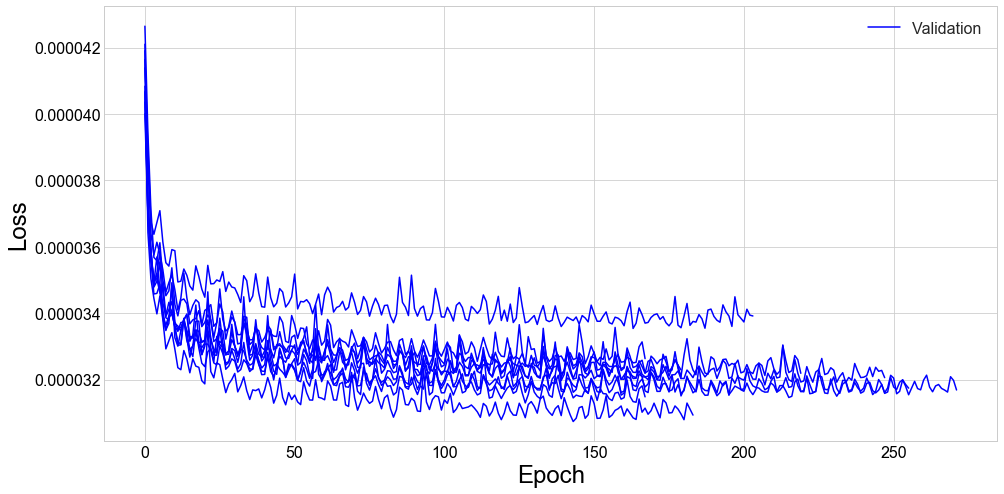

Mean loss = 3.19e-05 +- 2e-07
Mean wAUC = 0.0641 +- 0.0009
Mean AUC = 0.1 +- 0.001
Mean AMS = 3.76 +- 0.05
Mean cut = 0.956 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [21]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [4]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [5]:
import warnings
from hepml_tools.general.ensemble_functions import *

def assemble_ensemble(results, size, metric='loss', weighting='reciprocal',
                      cycle_losses=None, n_cycles=None, load_cycles_only=False, patience=2,
                      compile_args=None, mva='NN', load_mode='model',
                      location='train_weights/', verbose=True):
    if (cycle_losses is not None and n_cycles is None) or (cycle_losses is None and n_cycles is not None):
        warnings.warn("Warning: cycle ensembles requested, but not enough information passed")
        return None, None
    if cycle_losses is not None and n_cycles is not None and metric is not 'loss':
        warnings.warn("Warning: Setting ensemble metric to loss")
        metric = 'loss'
    if cycle_losses is not None and n_cycles is not None and weighting is not 'uniform':
        warnings.warn("Warning: Setting model weighting to uniform")
        weighting = 'uniform'
    
    ensemble = []
    weights = []
    
    if verbose:
        print("Choosing ensemble by", metric)
    dtype = [('model', int), ('result', float)]
    values = np.sort(np.array([(i, result[metric]) for i, result in enumerate(results)], dtype=dtype),
                     order=['result'])
    
    for i in range(min([size, len(results)])):
        if not (load_cycles_only and n_cycles):
            ensemble.append(load_trained_model(values[i]['model'], compile_args, mva, load_mode, location + 'train_'))
            weights.append(get_weights(values[i]['result'], metric, weighting))
        
            if verbose:
                print("Model", i, "is", values[i]['model'], "with", metric, "=", values[i]['result'])
        
        if n_cycles:
            end_cycle = len(cycle_losses[values[i]['model']])-patience
            if load_cycles_only:
                end_cycle += 1
            
            for n, c in enumerate(range(end_cycle, max(0, end_cycle-n_cycles), -1)):
                ensemble.append(load_trained_model(c, compile_args, mva, load_mode, location + f'{values[i]["model"]}_cycle_'))
                weights.append((n+1)**-0)
            
                if verbose:
                    print("Model", i, "cycle", c, "has", metric, "=", cycle_losses[values[i]['model']][c], 'and weight', weights[-1])
        
    weights = np.array(weights)
    weights = weights / weights.sum()  # normalise weights
    return ensemble, weights

In [6]:
ensemble, weights = assemble_ensemble(results, 10, cycle_losses=None, n_cycles=None, load_cycles_only=False)

Choosing ensemble by loss
Model 0 is 0 with loss = 3.0738480063155294e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model 1 is 9 with loss = 3.129852296078423e-05
Model 2 is 8 with loss = 3.146191096166149e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model 3 is 2 with loss = 3.15005800540826e-05
Model 4 is 7 with loss = 3.1840594671666625e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model 5 is 1 with loss = 3.197377564766196e-05
Model 6 is 5 with loss = 3.208699423543011e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model 7 is 4 with loss = 3.216740200162867e-05
Model 8 is 3 with loss = 3.2439628088468455e-05
Model 9 is 6 with loss = 3.354073257374494e-05


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
def test_ensemble(size, rot_mult, n_cycles):
    ensemble, weights = assemble_ensemble(results, size, cycle_losses=cycle_losses, n_cycles=n_cycles, load_cycles_only=True, patience=patience, weighting='uniform')
    #val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))
    val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=rot_mult, reflect_y=True, reflect_z=True)
    fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=0)
    val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')
    ams, cut = ams_scan_slow(val_df_tta, br=10, w_factor=250000/50000)
    print(size, rot_mult, n_cycles, ams, cut)

In [13]:
%%capture --no-stdout
size = 10
rot_mult = 2
for n_cycles in [0,1,2,3]:
    print('__________________________________')
    test_ensemble(size, rot_mult, n_cycles)
    print('__________________________________\n')

__________________________________
Choosing ensemble by loss
Model 0 is 0 with loss = 3.0738480063155294e-05
Model 1 is 9 with loss = 3.129852296078423e-05
Model 2 is 8 with loss = 3.146191096166149e-05
Model 3 is 2 with loss = 3.15005800540826e-05
Model 4 is 7 with loss = 3.1840594671666625e-05
Model 5 is 1 with loss = 3.197377564766196e-05
Model 6 is 5 with loss = 3.208699423543011e-05
Model 7 is 4 with loss = 3.216740200162867e-05
Model 8 is 3 with loss = 3.2439628088468455e-05
Model 9 is 6 with loss = 3.354073257374494e-05
Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 8
50000 candidates loaded
10 2 0 3.8522173978929635 0.96278226
__________________________________

__________________________________
Choosing ensemble by loss
Model 0 cycle 37 has loss = 3.083529240975622e-05 and weight 1
Model 1 cycle 33 has loss = 3.1496374654405615e-05 and weight 1
Model 2 cycle 55 has loss = 3.164870618202258e-05 and weig

In [ ]:
%%capture --no-stdout
size = 1
rot_mult = 2
for n_cycles in [1,2,3,4]:
    print('__________________________________')
    test_ensemble(size, rot_mult, n_cycles)
    print('__________________________________\n')

In [ ]:
%%capture --no-stdout
size = 1
rot_mult = 2
for n_cycles in [1,2,3,4]:
    print('__________________________________')
    test_ensemble(size, rot_mult, n_cycles)
    print('__________________________________\n')

## Response on validation data without TTA

In [ ]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [ ]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
val_df = convert_to_df(val_fy.source)

In [ ]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

In [ ]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

In [ ]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

## Response on validation data with TTA

In [7]:
val_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), rot_mult=2)

Augmenting via phi rotations
Augmenting via y flips
Augmenting via longitunidnal flips
Total augmentation multiplicity is 8


In [8]:
fold_ensemble_predict(ensemble, weights, val_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0007691035192001436s per sample

Predicting fold 2 out of 10
Prediction took 0.0006980874029999541s per sample

Predicting fold 3 out of 10
Prediction took 0.0007107375767998747s per sample

Predicting fold 4 out of 10
Prediction took 0.000693857167600072s per sample

Predicting fold 5 out of 10
Prediction took 0.0007088095248000173s per sample

Predicting fold 6 out of 10
Prediction took 0.000690356513599545s per sample

Predicting fold 7 out of 10
Prediction took 0.0007031518351999694s per sample

Predicting fold 8 out of 10
Prediction took 0.000709708603600302s per sample

Predicting fold 9 out of 10
Prediction took 0.0007406947823998053s per sample

Predicting fold 10 out of 10
Prediction took 0.0007139892803999828s per sample



In [9]:
val_df_tta = convert_to_df(val_fy.source, pred_name='pred_TTA')

50000 candidates loaded


In [10]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class),
                                                           roc_auc_score(val_df_tta.gen_target, val_df_tta.pred_class, sample_weight=val_df_tta.gen_weight)))

Testing ROC AUC: unweighted 0.9027819467042939, weighted 0.9359654824738782


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Best cut at 0.9603523134111284 corresponds to AMS of 3.808275155070543
Maximum AMS for data is 3.851873551509353 at cut of 0.9627765417098999
CPU times: user 13.4 s, sys: 46.1 ms, total: 13.5 s
Wall time: 13.5 s


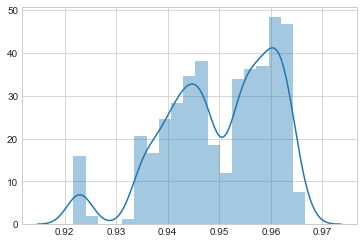

In [11]:
%%time
cut_kde_tta = kde_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.95005 corresponds to AMS of 3.763934880118826
Maximum AMS for data is 3.851873551509353 at cut of 0.9627765417098999
CPU times: user 89.7 ms, sys: 9.85 ms, total: 99.6 ms
Wall time: 49.5 ms


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


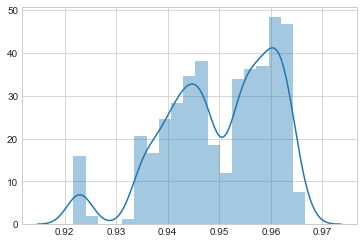

In [12]:
%%time
cut_mean_tta = mean_optimise_cut(val_df_tta, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [ ]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde)

In [ ]:
score_test_data(test_fy.source, cut_mean)

# Test scoring - With TTA

In [ ]:
test_fy = HEPAugFoldYielder(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), rot_mult=3, random_rot=True)

In [ ]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, pred_name='pred_TTA', ensemble_size=ensemble_size, verbose=1)

In [ ]:
score_test_data(test_fy.source, cut_kde_tta, pred_name='pred_TTA')

In [ ]:
score_test_data(test_fy.source, cut_mean_tta, pred_name='pred_TTA')

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)